In [28]:
import pymongo
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from bson.code import Code

### Imports

Importing libraries

In [29]:
mongo_connection = pymongo.MongoClient("localhost", 27017)
news_aggreg = mongo_connection.local.news_aggregator
# Loading our whole database to
bundle_list = list(
    news_aggreg.aggregate([
            {"$match" : {"_id" : {"$exists" : True}}}
        ],allowDiskUse=True)
)

### Mongodb connection

Connecting to mongodb and getting our colleciton into a list

In [30]:
# Let's get the raw string for each category
str_b, str_t, str_m, str_e, doc_tot = ["", "", "", "", ""]
count_b, count_t, count_m, count_e = [0, 0, 0, 0]
for doc in bundle_list:
    cat = doc["category"]
    doc_tot += doc["title"]
    if cat == "t":
        count_t += 1
        str_t += doc["title"] + " "
    elif cat == "b":
        count_b += 1
        str_b += doc["title"] + " "
    elif cat == "m":
        count_m += 1
        str_m += doc["title"] + " "
    else:
        count_e += 1
        str_e += doc["title"] + " "

### String extraction

Getting 5 strings : one for each of our 4 categories and another one containing every titles from our database

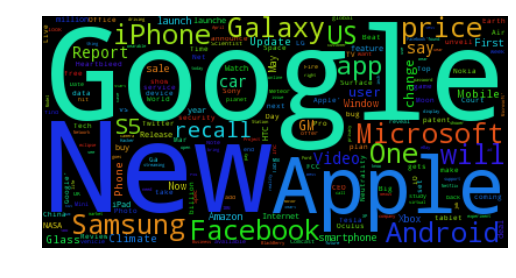

In [31]:
# Wordcloud for t category

wordcloud = WordCloud().generate(str_t)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

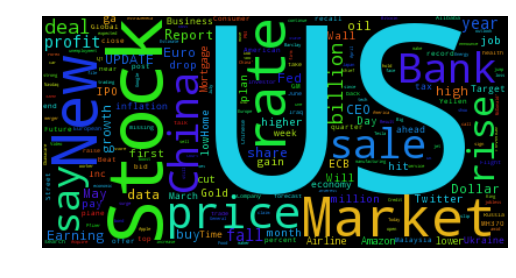

In [32]:
# Wordcloud for b category

wordcloud = WordCloud().generate(str_b)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

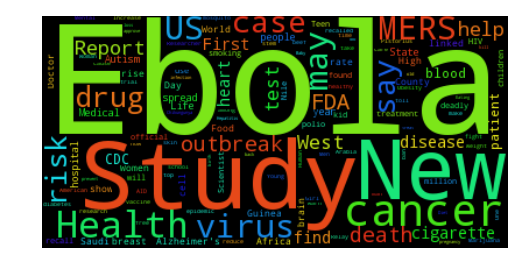

In [33]:
# Wordcloud for m category

wordcloud = WordCloud().generate(str_m)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

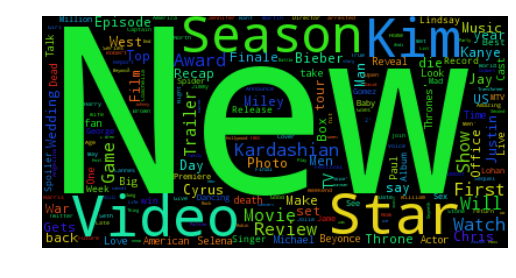

In [34]:
# Wordcloud for e category

wordcloud = WordCloud().generate(str_e)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

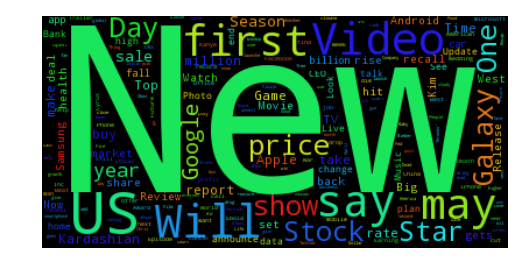

In [35]:
# General wordcloud

wordcloud = WordCloud().generate(doc_tot)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Wordclouds

Those wordclouds clearly show that the 4 categories got different vocabularies. We will next check the 20 most used words for each category, and in general. After that, we will check how much documents contains the words in each category to determine if these most used words can stand for a particular category or not.<br><br>
If we get something like "90% of the documents containing the word Google are technology related documents", then we can arguably say that Google highly stands for technology category. And the other way round, if we can't determine dominations for such words, then we will be able to say that those words do not stand for a particular category.<br><br>
In other words, we will try to see if there is a correlation between words in the title, and the category that the article belongs to. That will help us for our classifcation problem : if we can manually find a correlation, then training neural nets to perform such a task will be easy. However, if we can't establish the correlation, then training neural nets do not have any sense. The meaning behind a lack of correlation in this case is that there is no supposed link between the title and the category of the article

##### Facts

We can observe that very specific words, such as Apple or Kardashian, became less visible on the general wordcloud. But, there seem to be words that are powerfull for the 4 categories : words as "new" or "US" still are bigger then others. For US, this can be explained by the fact that the USA are a superpower and that the country is highly represented on the 4 categories. We can guess that generally a product launches/is presented first in the US. <br>
But, US are also highly involved in business world, then they appear on business category. Then comes the entertainment category. Many worldstars are american (singers, actors), so the US are also higly represented in this category.<br><br>
Concerning the "new" word, the explanation is a bit easier to get, and it's semantic. Whether it concerns technologies, business or medicine, we can use the word "new". For example, we can say that "Samsung unveils a new product" or that "A new disease has been discovered". Moreover, it also appears on the other wordclouds, then it is not suprising to see "new" appear on this graph.<br>
Those multiple appearances won't have any effect on our algorithm : even if the word is highly represented on each category, it does not clearly stand for a particular one. Then, our neural net will not give the word a high weight, and it will be neutral for the classification

In [36]:
# Getting the most used words in the title - t category
mapping_t = Code(
"""
function() {
    if(this.category == "t")
    {
        var summary = this.title;
        if (summary) { 
            // quick lowercase to normalize per your requirements
            summary = summary.toLowerCase().replace(/[.!–-]/g, " ");
            summary = summary.replace(/[(-);'",.?:/‘’|”]/g, " ");
            summary = summary.split(" ");
            for (var i = summary.length - 1; i >= 0; i--) {
                // might want to remove punctuation, etc. here
                if (summary[i].length < 50 && summary[i].length > 0)  {      // make sure there's something
                   emit(summary[i], 1); // store a 1 for each word
                }
            }
        }
    }
};
"""
)

reduce_t = Code(
"""
function( key, values ) {    
    var count = 0;    
    values.forEach(function(v) {            
        count +=v;    
    });
    return count;
}
"""
)

result_t = news_aggreg.map_reduce(mapping_t, reduce_t, "t_category")

In [37]:
# Getting the most used words in the title - b category
mapping_b = Code(
"""
function() {
    if(this.category == "b")
    {
        var summary = this.title;
        if (summary) { 
            // quick lowercase to normalize per your requirements
            summary = summary.toLowerCase().replace(/[.!–-]/g, " ");
            summary = summary.replace(/[(-);'",.?:/‘’|”]/g, " ");
            summary = summary.split(" ");
            for (var i = summary.length - 1; i >= 0; i--) {
                // might want to remove punctuation, etc. here
                if (summary[i].length < 50 && summary[i].length > 0)  {      // make sure there's something
                   emit(summary[i], 1); // store a 1 for each word
                }
            }
        }
    }
};
"""
)

reduce_b = Code(
"""
function( key, values ) {    
    var count = 0;    
    values.forEach(function(v) {            
        count +=v;    
    });
    return count;
}
"""
)

result_b = news_aggreg.map_reduce(mapping_b, reduce_b, "b_category")

In [38]:
# Getting the most used words in the title - m category
mapping_m = Code(
"""
function() {
    if(this.category == "m")
    {
        var summary = this.title;
        if (summary) { 
            // quick lowercase to normalize per your requirements
            summary = summary.toLowerCase().replace(/[.!–-]/g, " ");
            summary = summary.replace(/[(-);'",.?:/‘’|”]/g, " ");
            summary = summary.split(" ");
            for (var i = summary.length - 1; i >= 0; i--) {
                // might want to remove punctuation, etc. here
                if (summary[i].length < 50 && summary[i].length > 0)  {      // make sure there's something
                   emit(summary[i], 1); // store a 1 for each word
                }
            }
        }
    }
};
"""
)

reduce_m = Code(
"""
function( key, values ) {    
    var count = 0;    
    values.forEach(function(v) {            
        count +=v;    
    });
    return count;
}
"""
)

result_m = news_aggreg.map_reduce(mapping_m, reduce_m, "m_category")

In [39]:
# Getting the most used words in the title - e category
mapping_e = Code(
"""
function() {
    if(this.category == "e")
    {
        var summary = this.title;
        if (summary) { 
            // quick lowercase to normalize per your requirements
            summary = summary.toLowerCase().replace(/[.!–-]/g, " ");
            summary = summary.replace(/[(-);'",.?:/‘’|”]/g, " ");
            summary = summary.split(" ");
            for (var i = summary.length - 1; i >= 0; i--) {
                // might want to remove punctuation, etc. here
                if (summary[i].length < 50 && summary[i].length > 0)  {      // make sure there's something
                   emit(summary[i], 1); // store a 1 for each word
                }
            }
        }
    }
};
"""
)

reduce_e = Code(
"""
function( key, values ) {    
    var count = 0;    
    values.forEach(function(v) {            
        count +=v;    
    });
    return count;
}
"""
)

result_e = news_aggreg.map_reduce(mapping_e, reduce_e, "e_category")

In [40]:
# Getting the most used words in the title - e category
mapping = Code(
"""
function() {
    var summary = this.title;
    if (summary) { 
        // quick lowercase to normalize per your requirements
        summary = summary.toLowerCase().replace(/[.!–-]/g, " ");
        summary = summary.replace(/[(-);'",.?:/‘’|”]/g, " ");
        summary = summary.split(" ");
        for (var i = summary.length - 1; i >= 0; i--) {
            // might want to remove punctuation, etc. here
            if (summary[i].length < 50 && summary[i].length > 0)  {      // make sure there's something
                emit(summary[i], 1); // store a 1 for each word
            }
        }
    }
};
"""
)

reduce = Code(
"""
function( key, values ) {    
    var count = 0;    
    values.forEach(function(v) {            
        count +=v;    
    });
    return count;
}
"""
)

result = news_aggreg.map_reduce(mapping, reduce, "general_count")

### Map-Reduce

Using mongodb to count the words in our documents and titles. Storing the results in temp collections. <br><br>
Facing a problem when map-reducing : "alive." and "alive" are considered as different words leading in counting errors.<br>
Workaround : getting rid of punctuation. We decided to replace ".", ",", "!", "?", "-", "'", '"', "(", ")" by a single space, so that the punctuation doesn't fake our count.<br><br>
We also decided to split the search on the 4 categories in order to get the most used words by category. We will compare this to total words.

In [41]:
# Getting the 100 most used words in our documents and their count
list_gen = list(result.find())
list_sorted_gen = sorted(list_gen, key=lambda x: x['value'], reverse=True)
list_t = list(result_t.find())
list_sorted_t = sorted(list_t, key=lambda x: x['value'], reverse=True)
list_e = list(result_e.find())
list_sorted_e = sorted(list_e, key=lambda x: x['value'], reverse=True)
list_b = list(result_b.find())
list_sorted_b = sorted(list_b, key=lambda x: x['value'], reverse=True)
list_m = list(result_m.find())
list_sorted_m = sorted(list_m, key=lambda x: x['value'], reverse=True)
print("We actually got {} different words on this collection".format(len(list_gen)))
print("We actually got {} different words on the t category".format(len(list_t)))
print("We actually got {} different words on the b category".format(len(list_b)))
print("We actually got {} different words on the m category".format(len(list_m)))
print("We actually got {} different words on the e category".format(len(list_e)))

We actually got 58933 different words on this collection
We actually got 26727 different words on the t category
We actually got 27129 different words on the b category
We actually got 16677 different words on the m category
We actually got 32780 different words on the e category


### Lists

Getting the associated words lists for our news aggregator. Please have a look below for statistics

In [42]:
print("Getting word count for the whole collection - we will then compare it to each category individually")
print("\tKEY_GEN\t\tVALUE\t\tAVG (WORDS/DOC)")
# Formatting the result
for index, words_gen in zip(range(0, 31), list_sorted_gen):
    if len(words_gen["_id"]) < 8:
        print("{}\t{}\t\t{}\t\t{}".format(
                index, 
                words_gen["_id"], 
                int(words_gen["value"]), 
                words_gen["value"]/len(bundle_list)
            ))
    else:
        print("{}\t{}\t{}\t\t{}".format(
                index, 
                words_gen["_id"], 
                int(words_gen["value"]), 
                words_gen["value"]/len(bundle_list)
            ))

Getting word count for the whole collection - we will then compare it to each category individually
	KEY_GEN		VALUE		AVG (WORDS/DOC)
0	to		98688		0.23333971726285474
1	the		70123		0.1658001073445927
2	in		69374		0.1640291580069845
3	s		66560		0.1573756847946621
4	of		58530		0.13838940551429646
5	for		52747		0.12471597424675543
6	on		40311		0.09531206775477198
7	and		38194		0.09030659412631195
8	a		32358		0.07650784868668384
9	with		26971		0.06377072708228412
10	new		24405		0.057703629618595674
11	at		22150		0.052371866259040945
12	is		21889		0.05175475307197053
13	us		16810		0.03974587231668073
14	as		16510		0.039036546814300944
15	from		12990		0.03071379425304478
16	after		12467		0.029477203460562686
17	google		12347		0.029193473259610768
18	up		11908		0.028155493607795016
19	by		11110		0.02626868777146478
20	be		10512		0.02485476560338774
21	apple		10444		0.024693985156181653
22	2014		9697		0.022927764655255985
23	will		9167		0.021674622934385025
24	says		9048		0.021393257151774377
2

In [43]:
print("\tKEY_T\t\tVALUE_T\t\tAVG (WORDS/T)\t\t\tKEY_B\tVALUE_B\tAVG (WORDS/B)\n")
# Formatting the result
for index, words_t, words_b in zip(range(0, 31), list_sorted_t, list_sorted_b):
    if len(words_t["_id"]) < 8 and len(words_b["_id"]) < 8:
        print("{}\t{}\t\t{}\t{}\t{}\t\t{}\t{}".format(
                index, 
                words_t["_id"], 
                int(words_t["value"]), 
                words_t["value"]/count_t,
                words_b["_id"],
                int(words_b["value"]),
                words_b["value"]/count_b
            ))
    elif len(words_t["_id"]) < 8 and len(words_b["_id"]) >= 8:
        print("{}\t{}\t\t{}\t{}\t{}\t{}\t{}".format(
                index, 
                words_t["_id"], 
                int(words_t["value"]), 
                words_t["value"]/count_t,
                words_b["_id"],
                int(words_b["value"]),
                words_b["value"]/count_b
            ))
    elif len(words_t["_id"]) >= 8 and len(words_b["_id"]) < 8:
        print("{}\t{}\t{}\t{}\t{}\t\t{}\t{}".format(
                index, 
                words_t["_id"], 
                int(words_t["value"]), 
                words_t["value"]/count_t,
                words_b["_id"],
                int(words_b["value"]),
                words_b["value"]/count_b
            ))
    else:
        print("{}\t{}\t{}\t{}\t{}\t{}\t{}".format(
                index, 
                words_t["_id"], 
                int(words_t["value"]), 
                words_t["value"]/count_t,
                words_b["_id"],
                int(words_b["value"]),
                words_b["value"]/count_b
            ))

	KEY_T		VALUE_T		AVG (WORDS/T)			KEY_B	VALUE_B	AVG (WORDS/B)

0	to		30346	0.27967890288747776	to		29360	0.25317547233264637
1	the		16588	0.15288056551431758	in		21307	0.18373330343977165
2	s		16287	0.15010644866962203	s		16275	0.14034164891736442
3	in		15291	0.14092697897753978	for		14518	0.1251907870342425
4	for		15242	0.14047537856096146	on		12572	0.10841015116369312
5	of		12241	0.11281715712929596	of		12240	0.1055472677572068
6	google		11336	0.10447637392514493	the		10064	0.08678330904481447
7	on		10178	0.09380385795784449	us		9875	0.08515353505738701
8	and		10070	0.09280849377436569	as		7902	0.06814007433149086
9	apple		9554	0.08805286489774476	and		5969	0.05147153931721955
10	a		8503	0.0783664967788909	a		5606	0.04834133848422396
11	new		8022	0.07393343962839737	at		4906	0.04230513853078893
12	with		7908	0.07288277743472531	stocks		4762	0.04106340596893944
13	samsung		7803	0.07191506225634314	new		4694	0.04047703225917718
14	microsoft	6531	0.060191884095370636	with		4656	0.0401493

In [44]:
print("\tKEY_T\t\tVALUE_T\t\tAVG (WORDS/T)\t\t\tKEY_B\tVALUE_B\tAVG (WORDS/B)\n")
# Formatting the result
for index, words_e, words_m in zip(range(0, 31), list_sorted_e, list_sorted_m):
    if len(words_e["_id"]) < 8 and len(words_m["_id"]) < 8:
        print("{}\t{}\t\t{}\t{}\t{}\t\t{}\t{}".format(
                index, 
                words_e["_id"], 
                int(words_e["value"]), 
                words_e["value"]/count_e,
                words_m["_id"],
                int(words_m["value"]),
                words_m["value"]/count_m
            ))
    elif len(words_e["_id"]) < 8 and len(words_m["_id"]) >= 8:
        print("{}\t{}\t\t{}\t{}\t{}\t{}\t{}".format(
                index, 
                words_e["_id"], 
                int(words_e["value"]), 
                words_e["value"]/count_e,
                words_m["_id"],
                int(words_m["value"]),
                words_m["value"]/count_m
            ))
    elif len(words_e["_id"]) >= 8 and len(words_m["_id"]) < 8:
        print("{}\t{}\t{}\t{}\t{}\t\t{}\t{}".format(
                index, 
                words_e["_id"], 
                int(words_e["value"]), 
                words_e["value"]/count_e,
                words_m["_id"],
                int(words_m["value"]),
                words_m["value"]/count_m
            ))
    else:
        print("{}\t{}\t{}\t{}\t{}\t{}\t{}".format(
                index, 
                words_e["_id"], 
                int(words_e["value"]), 
                words_e["value"]/count_e,
                words_m["_id"],
                int(words_m["value"]),
                words_m["value"]/count_m
            ))

	KEY_T		VALUE_T		AVG (WORDS/T)			KEY_B	VALUE_B	AVG (WORDS/B)

0	the		39049	0.2555094616169812	to		10877	0.2383268695633121
1	s		29383	0.19226188918261053	in		9762	0.21389600999145467
2	to		28105	0.18389954720339205	of		7585	0.16619557834308377
3	of		26464	0.17316198602350355	for		6252	0.13698810228094394
4	in		23014	0.15058758866176356	s		4615	0.10111965643419006
5	and		19423	0.12709058549480462	the		4422	0.09689081706435286
6	for		16735	0.10950218546339675	ebola		3745	0.08205701264269594
7	a		15107	0.09884968723008873	study		3398	0.0744538662109161
8	on		14650	0.09585939749260607	a		3142	0.06884462849755692
9	with		12060	0.07891224121234329	on		2911	0.06378316790464296
10	at		11995	0.07848692647944094	health		2772	0.06073752711496746
11	is		9916	0.06488339833014893	cancer		2735	0.059926816976708513
12	new		9128	0.05972727510665585	and		2732	0.05986108372225509
13	kardashian	5945	0.03889993980160703	new		2561	0.05611428821840969
14	kim		5833	0.03816708980029838	with		2347	0.05142531606

In [45]:
# Defining dictionnaries, which are going to contain our words and occurences in documents

def create_entry():
    return {"nb_t" : 0, "nb_b" : 0, "nb_m" : 0, "nb_e" : 0, "tot" : 0}

maxLength = 50

diction_words_b = {}
for word in list_sorted_b[0:maxLength]:
    diction_words_b[word['_id']] = create_entry()

diction_words_m = {}
for word in list_sorted_m[0:maxLength]:
    diction_words_m[word['_id']] = create_entry()

diction_words_e = {}
for word in list_sorted_e[0:maxLength]:
    diction_words_e[word['_id']] = create_entry()

diction_words_t = {}
for word in list_sorted_t[1:maxLength+1]:
    diction_words_t[word['_id']] = create_entry()

diction_words_gen = {}
for word in list_sorted_gen[0:maxLength]:
    diction_words_gen[word['_id']] = create_entry()

### Dictionnaries

Creating five dictionnaries containing most used words in our documents - one for the whole collection, and four for each category. We will calculate how many of those words are used in each document

In [46]:
for word, values in diction_words_b.items():
    list_bag_words_b = list(news_aggreg.find(
    {
            "$text" : { "$search" : word }
    }
    ))
    for doc in list_bag_words_b:
        values["nb_" + doc["category"]] +=1
        values["tot"] +=1
        
for word, values in diction_words_m.items():
    list_bag_words_m = list(news_aggreg.find(
    {
            "$text" : { "$search" : word }
    }
    ))
    for doc in list_bag_words_m:
        values["nb_" + doc["category"]] +=1
        values["tot"] +=1
        
for word, values in diction_words_e.items():
    list_bag_words_e = list(news_aggreg.find(
    {
            "$text" : { "$search" : word }
    }
    ))
    for doc in list_bag_words_e:
        values["nb_" + doc["category"]] +=1
        values["tot"] +=1
        
for word, values in diction_words_t.items():
    list_bag_words_t = list(news_aggreg.find(
    {
            "$text" : { "$search" : word }
    }
    ))
    for doc in list_bag_words_t:
        values["nb_" + doc["category"]] +=1
        values["tot"] +=1

# Word percentage

For each tab below, we took the 50 most used words by category, and we performed a search in the indexed title field on our collection.<br>
After that, we calculated the percentage of document containing each word by category. And we can clearly see that some words are strongly indicating for some categories. Please have a look at each tab for more precise results.<br><br>

NOTE : If you count the words in tabs below, you won't reach 50 as suggested. That's due to mongodb indexing : it ignores words such as "the", "a", "is". Therefore, we chose not to print them on screen, in order to make reading easier.

In [47]:
# Formatting the data
print("\t\t\t\t\tDATA FOR THE B CATEGORY\n\n")
print("WORD\tB_CAT\t\t\tT_CAT\t\t\tM_CAT\t\t\tE_CAT\t\t\t\tOCCUR.\n")
for word, value in diction_words_b.items():
    if value["tot"] == 0:
        continue
    print(("{}\t{}\t{}\t{}\t{}\t\t{}").format(
        word, 
        ((100*value["nb_b"])/value["tot"]),
        ((100*value["nb_t"])/value["tot"]),
        ((100*value["nb_m"])/value["tot"]),
        ((100*value["nb_e"])/value["tot"]), 
        value["tot"]
    ))

					DATA FOR THE B CATEGORY


WORD	B_CAT			T_CAT			M_CAT			E_CAT				OCCUR.

will	22.587336244541486	34.35589519650655	5.775109170305677	37.28165938864629		9160
data	66.22315592903828	28.011204481792717	5.368814192343604	0.3968253968253968		4284
rate	76.24875951042011	3.5891498511412503	12.057558716506781	8.104531921931855		6046
shares	62.89037260391988	18.00559982769761	3.446047813913418	15.657979754469093		4643
stock	90.01538067162267	7.357087926172777	1.550884388618303	1.07664701358626		7802
ceo	60.790031813361615	34.88865323435843	1.325556733828208	2.99575821845175		3772
profit	90.04431314623338	7.444608567208272	0.6499261447562777	1.861152141802068		3385
s	55.81988105352591	27.060322854715377	9.282073067119796	7.837723024638913		4708
oil	94.7129909365559	2.1525679758308156	2.719033232628399	0.41540785498489424		2648
euro	98.66727941176471	0.9191176470588235	0.13786764705882354	0.2757352941176471		2176
rise	68.9556781434278	12.973178618984212	13.69602434848773	4.375118889100247		52

# Business category

On the left-hand column, we can clearly see some percentage > 90. That means that 90% of articles containing the specific word are related to the business category. <br>
Words like bank, euro, dollar, stocks are obviously indicating that an article is dealing about business. Then, we can arguably say that training a neural net to classify those datas is pertinent, and should give nice results.

In [48]:
# Formatting the data
print("\t\t\t\t\tDATA FOR THE T CATEGORY\n\n")
print("WORD\tT_CAT\t\t\tB_CAT\t\t\tM_CAT\t\t\tE_CAT\t\t\t\tOCCUR.\n")
for word, value in diction_words_t.items():
    if value["tot"] == 0:
        continue
    print(("{}\t{}\t{}\t{}\t{}\t\t{}").format(
        word, 
        ((100*value["nb_t"])/value["tot"]),
        ((100*value["nb_b"])/value["tot"]),
        ((100*value["nb_m"])/value["tot"]),
        ((100*value["nb_e"])/value["tot"]), 
        value["tot"]
    ))

					DATA FOR THE T CATEGORY


WORD	T_CAT			B_CAT			M_CAT			E_CAT				OCCUR.

will	34.35589519650655	22.587336244541486	5.775109170305677	37.28165938864629		9160
galaxy	87.26011933559103	0.09675858732462506	0.016126431220770843	12.62699564586357		6201
android	98.79960803527682	0.9309162175404213	0.0	0.2694757471827536		4082
gm	64.28932726353061	35.381891755184625	0.2276176024279211	0.10116337885685382		3954
t	69.49795680093403	22.504378283712786	0.40863981319322823	7.589025102159954		3426
report	32.93887530562347	30.924205378973106	16.361858190709047	19.775061124694375		10225
samsung	94.08328154133002	4.37538844002486	1.4170292106898694	0.12430080795525171		8045
s5	99.66752862947912	0.22164758034724788	0.03694126339120798	0.07388252678241596		2707
4	35.091743119266056	28.165137614678898	2.5688073394495414	34.174311926605505		6540
amazon	46.46484763991237	34.67436765584545	0.3584943238398725	18.50229038040231		5021
s	27.060322854715377	55.81988105352591	9.282073067119796	7.83772302463891

# Technology category

Once more, we can clearly see that some words are indicating that an article deals with technology. Brands representing words (Google, Microsoft, Apple) strongly stand for technology. Devices like xbox, s5, one (htc or one plus one) are also a good indication for this category.

In [49]:
# Formatting the data
print("\t\t\t\t\tDATA FOR THE E CATEGORY\n\n")
print("WORD\tE_CAT\t\t\tT_CAT\t\t\tM_CAT\t\t\tB_CAT\t\t\t\tOCCUR.\n")
for word, value in diction_words_e.items():
    if value["tot"] == 0:
        continue
    print(("{}\t{}\t{}\t{}\t{}\t\t{}").format(
        word, 
        ((100*value["nb_e"])/value["tot"]),
        ((100*value["nb_t"])/value["tot"]),
        ((100*value["nb_m"])/value["tot"]),
        ((100*value["nb_b"])/value["tot"]), 
        value["tot"]
    ))

					DATA FOR THE E CATEGORY


WORD	E_CAT			T_CAT			M_CAT			B_CAT				OCCUR.

kanye	99.97031760166222	0.0	0.0	0.029682398337785694		3369
will	37.28165938864629	34.35589519650655	5.775109170305677	22.587336244541486		9160
kardashian	99.98314796090327	0.016852039096730706	0.0	0.0		5934
trailer	95.3841823810864	4.559527160146355	0.028145229383619477	0.028145229383619477		3553
wedding	98.88977002379065	0.3436426116838488	0.07930214115781126	0.6872852233676976		3783
2014	56.68710381377949	19.474176452249818	3.844954795801725	19.99376493816897		9623
kim	99.7917028293699	0.05207429265752474	0.0	0.1562228779725742		5761
t	7.589025102159954	69.49795680093403	0.40863981319322823	22.504378283712786		3426
west	67.07317073170732	2.3954703832752613	27.090592334494772	3.440766550522648		4592
men	84.2838370565046	0.5256241787122208	11.40604467805519	3.7844940867279897		3805
s	7.837723024638913	27.060322854715377	9.282073067119796	55.81988105352591		4708
watch	60.31770045385779	28.472012102874434	3.5098

# Entertainment category

In my opinion, this should have been the hardest category to classify : we got an infinite number of ways to entertain ourselves, which doesn't ease the task. But our analysis shows good results. Words like Kanye, Kim, Kardashian, but also thrones, awards and wedding are good indicators for this category.

In [50]:
# Formatting the data
print("\t\t\t\t\tDATA FOR THE M CATEGORY\n\n")
print("WORD\tM_CAT\t\t\tT_CAT\t\t\tB_CAT\t\t\tE_CAT\t\t\t\tOCCUR.\n")
for word, value in diction_words_m.items():
    if value["tot"] == 0:
        continue
    print(("{}\t{}\t{}\t{}\t{}\t\t{}").format(
        word, 
        ((100*value["nb_m"])/value["tot"]),
        ((100*value["nb_t"])/value["tot"]),
        ((100*value["nb_b"])/value["tot"]),
        ((100*value["nb_e"])/value["tot"]), 
        value["tot"]
    ))

					DATA FOR THE M CATEGORY


WORD	M_CAT			T_CAT			B_CAT			E_CAT				OCCUR.

e	48.61918604651163	24.236918604651162	13.517441860465116	13.626453488372093		2752
blood	43.78109452736319	28.810492989597467	0.4975124378109453	26.910900045228402		2211
drug	67.37945492662473	1.2159329140461217	13.668763102725366	17.735849056603772		2385
cancer	85.88597842835131	0.18489984591679506	6.409861325115562	7.519260400616333		3245
disease	92.4476797088262	1.0009099181073704	1.5468607825295724	5.004549590536851		1099
heart	62.11401425178147	8.729216152019003	1.3657957244655583	27.790973871733968		1684
report	16.361858190709047	32.93887530562347	30.924205378973106	19.775061124694375		10225
west	27.090592334494772	2.3954703832752613	3.440766550522648	67.07317073170732		4592
s	9.282073067119796	27.060322854715377	55.81988105352591	7.837723024638913		4708
outbreak	99.43538268506902	0.0	0.37641154328732745	0.18820577164366373		1594
cdc	100.0	0.0	0.0	0.0		897
us	11.211962529819049	18.100890207715132	59.0271

# Medical category

This category shows less encouraging results. We only got a few words indicating for this category, and words like "health", "heart", "blood" only stand for 50% for this category. However, there still are strong words for this category, even if they are not in big number. <br>
In fact, that will not affect our neural net that much because other categories will stand stronger for themselves. The neural net won't be searching for articles dealing with medicine, but rather for articles not dealing with the 3 other ones.

# Conclusion

For now we can see that our results are encouraging : words contained in titles are good indicators for an article's category. In this dataset, which contains more than 400 000 articles' titles, we can guess that training a neural net should give good results : the words are clearly creating shapes for specific themes. Then, if applied to Tiger database, the results should be equivalent. We got a very good amount of articles, and the vocabulary is similar to this dataset's one. We got very specific words polluated by other "standard" ones